In [305]:
#Importacion de librerias  pandas, numpy y matplolib respectivamente 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [306]:
data = pd.read_csv('Roma_sin_nulos.csv')


In [307]:
#Verificamos información del DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35247 entries, 0 to 35246
Data columns (total 66 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   34061 non-null  float64
 1   id                           34061 non-null  float64
 2   name                         34061 non-null  object 
 3   description                  34061 non-null  object 
 4   neighborhood_overview        34061 non-null  object 
 5   host_id                      34061 non-null  float64
 6   host_name                    34061 non-null  object 
 7   host_since                   34061 non-null  object 
 8   host_location                34061 non-null  object 
 9   host_response_time           34061 non-null  object 
 10  host_response_rate           34061 non-null  object 
 11  host_acceptance_rate         34061 non-null  object 
 12  neighbourhood                34061 non-null  object 
 13  neighbourhood_cl

In [308]:
#Imprimo los primeros cinco registros del DataFrame
data.head(5)

Unnamed: 0       id                                              name  \
0         0.0   2737.0                  Elif's room in cozy, clean flat.   
1         1.0   3079.0         Cozy apartment  (2-4)with Colisseum  view   
2         2.0  11834.0                  Rome "Charming Boschetto Studio"   
3         3.0  12398.0               Casa Donatello - Home far from Home   
4         4.0  19965.0  S.Peter's Basilica 5 MIN WALK two large bedrooms   

                                         description  \
0  10 min by bus you can get to Piazza Venezia or...   
1  With the view of the Colisseum from the front ...   
2  The apartment is located on the ground floor o...   
3  Casa Donatello is a newly renovated two-bedroo...   
4  Bright and quiet two bedrooms apartment 3rd fl...   

                               neighborhood_overview  host_id host_name  \
0  It used to be an industrial area until late 80...   3047.0      Elif   
1  Monti neighborhood is one of the best areas in...   3504.0     Laura   
2  "Monti" with its narrow cobblestone alleys, cr...  44552.0    Serena   
3  You are at 15 minutes walking distance from hi...  11756.0       Gea   
4  Prati is a famous neighbourhood (rione of Rome...  75450.0      Sasa   

   host_since host_location  host_response_time  ...     neighbourhood.1  \
0  18/09/2008   Rome, Italy      within an hour  ...  Rome, Lazio, Italy   
1  08/10/2008   Rome, Italy  within a few hours  ...  Rome, Lazio, Italy   
2  09/10/2009   Rome, Italy  within a few hours  ...  Rome, Lazio, Italy   
3  30/03/2009   Rome, Italy      within an hour  ...  Rome, Lazio, Italy   
4  30/01/2010   Rome, Italy      within an hour  ...  Rome, Lazio, Italy   

  neighbourhood_cleansed.1                    property_type.1  \
0         I Centro Storico  Private room in bed and breakfast   
1         I Centro Storico  Private room in bed and breakfast   
2          XII Monte Verde                 Entire rental unit   
3        VIII Appia Antica                       Private room   
4         I Centro Storico                 Entire rental unit   

       room_type.1  bathrooms_text.1  \
0     Private room    1 private bath   
1     Private room    1 private bath   
2  Entire home/apt            1 bath   
3     Private room         1.5 baths   
4  Entire home/apt            1 bath   

                                         amenities.1 has_availability  \
0  ["Cleaning available during stay", "Safe", "Cr...                t   
1  ["Air conditioning", "Safe", "Crib", "Cleaning...                t   
2  ["Wine glasses", "Cleaning products", "Dedicat...                t   
3  ["Air conditioning", "Wine glasses", "Dining t...                t   
4  ["Dedicated workspace", "Ethernet connection",...                t   

  instant_bookable  host_total_listings_count  review_scores_accuracy  
0                t                         54                     NaN  
1                t                         54                    5.00  
2                f                          2                    4.71  
3                f                          7                    4.60  
4                f                         11                    4.38  

[5 rows x 66 columns]

In [309]:
#Obtengo un análisis univariado de las variables categóricas
freq_tbl(data)

                                            name  frequency  percentage  \
0                                      #¿NOMBRE?         12    0.000340   
1                                   Appartamento         12    0.000340   
2                 Appartamento nel cuore di Roma         11    0.000312   
3                                 Vacanze Romane         10    0.000284   
4                            Camera Matrimoniale         10    0.000284   
...                                          ...        ...         ...   
33186  MODO Rome Suite & Rooms - Double Superior          1    0.000028   
33187                    La Dolce Casa di Giulia          1    0.000028   
33188    CHARMING PENTHOUSE IN THE HEART OF ROME          1    0.000028   
33189                            Il Parco di Pia          1    0.000028   
33190            Elegant Flat - Vatican District          1    0.000028   

       cumulative_perc  
0             0.000352  
1             0.000705  
2             0.001028  

In [310]:
# Eliminar % y convertir a número
data["host_response_rate"] = data["host_response_rate"].str.replace('%', '', regex=True).astype(float) / 100  

In [311]:
# Contar solo los valores no nulo
n = data["host_response_rate"].dropna().shape[0]
n

34061

In [312]:
data['host_response_rate'].info()
n=26582

<class 'pandas.core.series.Series'>
RangeIndex: 35247 entries, 0 to 35246
Series name: host_response_rate
Non-Null Count  Dtype  
--------------  -----  
34061 non-null  float64
dtypes: float64(1)
memory usage: 275.5 KB


In [313]:
Min = data["host_response_rate"].min()  
Max = data["host_response_rate"].max()  
Limites = [Min,Max]
Limites

[0.0, 1.0]

In [314]:
R = Max - Min
R

1.0

In [315]:
ni = 1+3.32*np.log10(n)
ni

15.689631010177528

In [316]:
i = R/ni
i

0.06373636189094067

**Creación de Categorias a partir de clases**

In [317]:
# Ver resultado
intervalos = np.linspace(0.0, 1.1, 12) #Número de clases más uno
intervalos

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1])

In [318]:
categorias = ["Categoría1", "Categoría2", "Categoría3", "Categoría4",
              "Categoría5", "Categoría6", "Categoría7", "Categoría8",
              "Categoría9","Categoría10","Categoría11"]


In [319]:
data["host_response_rate"] = pd.cut(x = data["host_response_rate"], bins = intervalos, labels = categorias)
data["host_response_rate"]

0        Categoría10
1        Categoría10
2        Categoría10
3        Categoría10
4        Categoría10
            ...     
35242            NaN
35243            NaN
35244            NaN
35245            NaN
35246            NaN
Name: host_response_rate, Length: 35247, dtype: category
Categories (11, object): ['Categoría1' < 'Categoría2' < 'Categoría3' < 'Categoría4' ... 'Categoría8' < 'Categoría9' < 'Categoría10' < 'Categoría11']

In [320]:
#Obtengo un análisis univariado de una variable categórica en específico  
data1 = freq_tbl(data["host_response_rate"])
data1

host_response_rate  frequency  percentage  cumulative_perc
0         Categoría10      25620    0.726870         0.761684
1          Categoría8       5941    0.168553         0.938310
2          Categoría9       1086    0.030811         0.970597
3          Categoría7        301    0.008540         0.979546
4          Categoría5        241    0.006837         0.986711
5          Categoría6        157    0.004454         0.991378
6          Categoría4        118    0.003348         0.994886
7          Categoría3         78    0.002213         0.997205
8          Categoría1         48    0.001362         0.998632
9          Categoría2         46    0.001305         1.000000
10        Categoría11          0    0.000000         1.000000

In [321]:
#Elimino las columnas "procentage" y "cumulative_perc" para trabajar con las fecuencias
table1 = data1.drop(['percentage', 'cumulative_perc'], axis=1)
table1

host_response_rate  frequency
0         Categoría10      25620
1          Categoría8       5941
2          Categoría9       1086
3          Categoría7        301
4          Categoría5        241
5          Categoría6        157
6          Categoría4        118
7          Categoría3         78
8          Categoría1         48
9          Categoría2         46
10        Categoría11          0

In [322]:
filtro = table1[table1['frequency'] > 1000]
filtro

host_response_rate  frequency
0        Categoría10      25620
1         Categoría8       5941
2         Categoría9       1086

In [323]:
#Ajusto el indice de mi DataFrame
Filtro_index = filtro.set_index("host_response_rate")
Filtro_index

frequency
host_response_rate           
Categoría10             25620
Categoría8               5941
Categoría9               1086

Text(0, 0.5, 'Frecuencia')

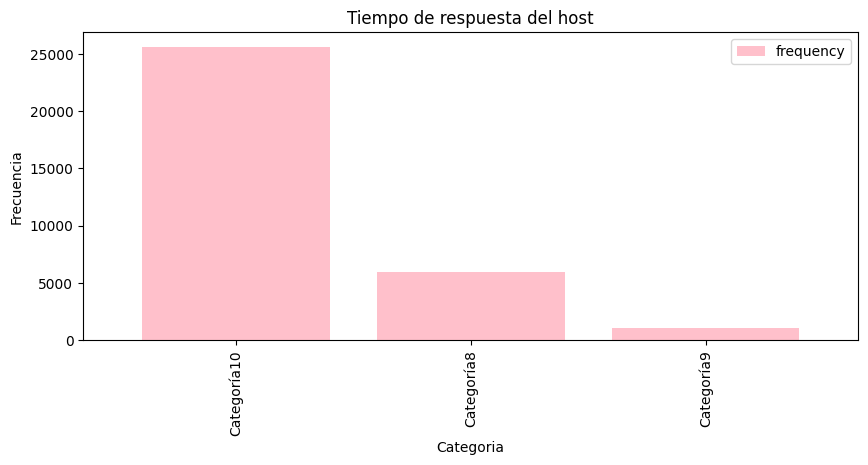

In [324]:
#Realizamos grafico de barras del Dataframe filtrado
Filtro_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color = "pink")
plt.title('Tiempo de respuesta del host')
plt.xlabel('Categoria')
plt.ylabel('Frecuencia')

In [325]:
# Eliminar % y convertir a número
data["host_acceptance_rate"] = data["host_acceptance_rate"].str.replace('%', '', regex=True).astype(float) / 100  

In [326]:
Min = data["host_acceptance_rate"].min()  
Max = data["host_acceptance_rate"].max()  
Limites = [Min,Max]
Limites

[0.0, 1.0]

In [327]:
#Calcula el rango
R = Max - Min
R

1.0

In [328]:
#Calcular el número de Intervalos de Clase (ni). Se aplica la regla de Sturges (Donde “n” el tamaño de la muestra.):
ni = 1+3.32*np.log10(n)
ni

15.689631010177528

In [329]:
#Calcular el Ancho del Intervalo ( i )
i = R/ni
i

0.06373636189094067

In [330]:
# Ver resultado
intervalos = np.linspace(0.0, 1.0, 16) #Número de clases más uno
intervalos

array([0.        , 0.06666667, 0.13333333, 0.2       , 0.26666667,
       0.33333333, 0.4       , 0.46666667, 0.53333333, 0.6       ,
       0.66666667, 0.73333333, 0.8       , 0.86666667, 0.93333333,
       1.        ])

In [331]:
categorias = ["Categoría1", "Categoría2", "Categoría3", "Categoría4",
              "Categoría5", "Categoría6", "Categoría7", "Categoría8",
              "Categoría9","Categoría10","Categoría11","Categoría12",
              "Categoría13","Categoría14","Categoría15"]


In [332]:
data["host_acceptance_rate"] = pd.cut(x = data["host_acceptance_rate"], bins = intervalos, labels = categorias)
data["host_acceptance_rate"]

0         Categoría1
1                NaN
2        Categoría15
3        Categoría14
4        Categoría15
            ...     
35242            NaN
35243            NaN
35244            NaN
35245            NaN
35246            NaN
Name: host_acceptance_rate, Length: 35247, dtype: category
Categories (15, object): ['Categoría1' < 'Categoría2' < 'Categoría3' < 'Categoría4' ... 'Categoría12' < 'Categoría13' < 'Categoría14' < 'Categoría15']

In [333]:
#Obtengo un análisis univariado de una variable categórica en específico  
data1 = freq_tbl(data["host_acceptance_rate"])
data1

host_acceptance_rate  frequency  percentage  cumulative_perc
0           Categoría15      23880    0.677504         0.722367
1            Categoría8       3805    0.107952         0.837467
2           Categoría14       1776    0.050387         0.891191
3           Categoría13        758    0.021505         0.914121
4           Categoría12        621    0.017619         0.932906
5           Categoría11        526    0.014923         0.948817
6            Categoría9        286    0.008114         0.957469
7            Categoría5        244    0.006923         0.964850
8            Categoría4        204    0.005788         0.971021
9           Categoría10        204    0.005788         0.977192
10           Categoría7        199    0.005646         0.983211
11           Categoría6        184    0.005220         0.988777
12           Categoría3        154    0.004369         0.993436
13           Categoría2        122    0.003461         0.997126
14           Categoría1         95    0.002695         1.000000

In [334]:
#Elimino las columnas "procentage" y "cumulative_perc" para trabajar con las fecuencias
table2 = data1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

host_acceptance_rate  frequency
0           Categoría15      23880
1            Categoría8       3805
2           Categoría14       1776
3           Categoría13        758
4           Categoría12        621
5           Categoría11        526
6            Categoría9        286
7            Categoría5        244
8            Categoría4        204
9           Categoría10        204
10           Categoría7        199
11           Categoría6        184
12           Categoría3        154
13           Categoría2        122
14           Categoría1         95

In [335]:
#Elimino las columnas "procentage" y "cumulative_perc" para trabajar con las fecuencias
table2 = data1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

host_acceptance_rate  frequency
0           Categoría15      23880
1            Categoría8       3805
2           Categoría14       1776
3           Categoría13        758
4           Categoría12        621
5           Categoría11        526
6            Categoría9        286
7            Categoría5        244
8            Categoría4        204
9           Categoría10        204
10           Categoría7        199
11           Categoría6        184
12           Categoría3        154
13           Categoría2        122
14           Categoría1         95

In [336]:
filtro2 = table2[table2['frequency'] > 500]
filtro2

host_acceptance_rate  frequency
0          Categoría15      23880
1           Categoría8       3805
2          Categoría14       1776
3          Categoría13        758
4          Categoría12        621
5          Categoría11        526

In [337]:
#Ajusto el indice de mi DataFrame
Filtro_index = filtro2.set_index("host_acceptance_rate")
Filtro_index

frequency
host_acceptance_rate           
Categoría15               23880
Categoría8                 3805
Categoría14                1776
Categoría13                 758
Categoría12                 621
Categoría11                 526

<Axes: xlabel='host_acceptance_rate'>

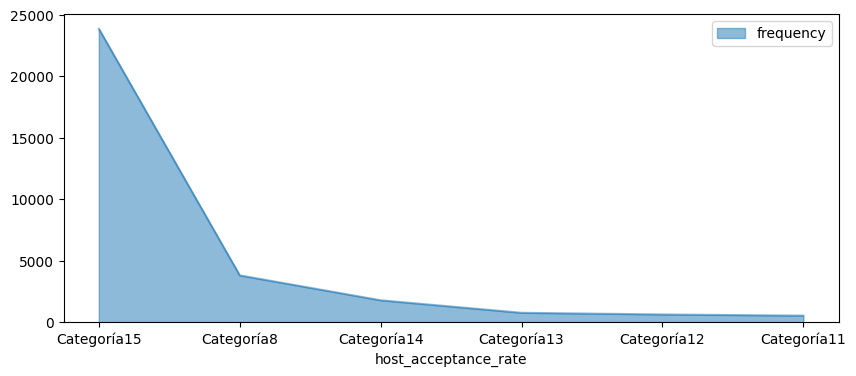

In [338]:
#Realizamos grafico de área del dataframe filtrado
Filtro_index.plot(kind='area', figsize=(10,4), alpha = 0.5)

In [339]:
Min = data["host_total_listings_count"].min()  
Max = data["host_total_listings_count"].max()  
Limites = [Min,Max]
Limites

[1, 7974]

In [340]:
#Calcula el rango
R = Max - Min
R

7973

In [341]:
#Calcular el número de Intervalos de Clase (ni). Se aplica la regla de Sturges (Donde “n” el tamaño de la muestra.):
ni = 1+3.32*np.log10(n)
ni

15.689631010177528

In [342]:
#Calcular el Ancho del Intervalo ( i )
i = R/ni
i

508.17001335646995

In [343]:
# Ver resultado
intervalos = np.linspace(1, 7324, 16) #Número de clases más uno
intervalos

array([1.0000e+00, 4.8920e+02, 9.7740e+02, 1.4656e+03, 1.9538e+03,
       2.4420e+03, 2.9302e+03, 3.4184e+03, 3.9066e+03, 4.3948e+03,
       4.8830e+03, 5.3712e+03, 5.8594e+03, 6.3476e+03, 6.8358e+03,
       7.3240e+03])

In [344]:
categorias = ["Categoría1", "Categoría2", "Categoría3", "Categoría4",
              "Categoría5", "Categoría6", "Categoría7", "Categoría8",
              "Categoría9","Categoría10","Categoría11","Categoría12",
              "Categoría13","Categoría14","Categoría15"]

In [345]:
data["host_total_listings_count"] = pd.cut(x = data["host_total_listings_count"], bins = intervalos, labels = categorias)
data["host_total_listings_count"]

0        Categoría1
1        Categoría1
2        Categoría1
3        Categoría1
4        Categoría1
            ...    
35242    Categoría1
35243           NaN
35244           NaN
35245    Categoría1
35246    Categoría1
Name: host_total_listings_count, Length: 35247, dtype: category
Categories (15, object): ['Categoría1' < 'Categoría2' < 'Categoría3' < 'Categoría4' ... 'Categoría12' < 'Categoría13' < 'Categoría14' < 'Categoría15']

In [346]:
#Obtengo un análisis univariado de una variable categórica en específico  
data1 = freq_tbl(data["host_total_listings_count"])
data1

host_total_listings_count  frequency  percentage  cumulative_perc
0                 Categoría1      24061    0.682640         0.975828
1                 Categoría2        557    0.015803         0.998418
2                 Categoría3         15    0.000426         0.999027
3                 Categoría8         10    0.000284         0.999432
4                 Categoría5          5    0.000142         0.999635
5                 Categoría4          3    0.000085         0.999757
6                 Categoría6          2    0.000057         0.999838
7                 Categoría7          2    0.000057         0.999919
8                Categoría11          2    0.000057         1.000000
9                 Categoría9          0    0.000000         1.000000
10               Categoría10          0    0.000000         1.000000
11               Categoría12          0    0.000000         1.000000
12               Categoría13          0    0.000000         1.000000
13               Categoría14          0    0.000000         1.000000
14               Categoría15          0    0.000000         1.000000

In [347]:
#Elimino las columnas "procentage" y "cumulative_perc" para trabajar con las fecuencias
table3 = data1.drop(['percentage', 'cumulative_perc'], axis=1)
table3

host_total_listings_count  frequency
0                 Categoría1      24061
1                 Categoría2        557
2                 Categoría3         15
3                 Categoría8         10
4                 Categoría5          5
5                 Categoría4          3
6                 Categoría6          2
7                 Categoría7          2
8                Categoría11          2
9                 Categoría9          0
10               Categoría10          0
11               Categoría12          0
12               Categoría13          0
13               Categoría14          0
14               Categoría15          0

In [348]:
filtro3 = table3[table3['frequency'] > 10]
filtro3

host_total_listings_count  frequency
0                Categoría1      24061
1                Categoría2        557
2                Categoría3         15

In [349]:
#Ajusto el indice de mi DataFrame
Filtro_index = filtro3.set_index("host_total_listings_count")
Filtro_index

frequency
host_total_listings_count           
Categoría1                     24061
Categoría2                       557
Categoría3                        15

Text(0, 0.5, 'Frecuencia')

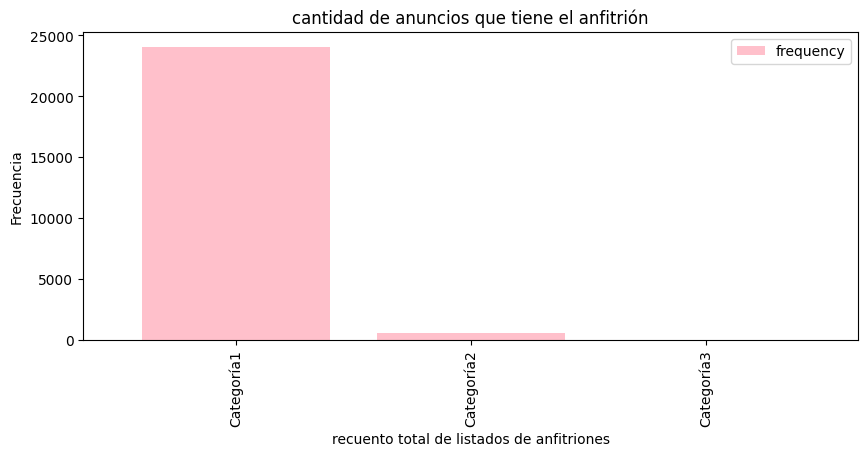

In [350]:
#Realizamos grafico de barras del Dataframe filtrado
Filtro_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color = "pink")
plt.title('cantidad de anuncios que tiene el anfitrión')
plt.xlabel('recuento total de listados de anfitriones')
plt.ylabel('Frecuencia')

In [351]:
Min = data["accommodates"].min()  
Max = data["accommodates"].max()  
Limites = [Min,Max]
Limites

[1.0, 16.0]

In [352]:
#Calcula el rango
R = Max - Min
R

15.0

In [353]:
#Calcular el número de Intervalos de Clase (ni). Se aplica la regla de Sturges (Donde “n” el tamaño de la muestra.):
ni = 1+3.32*np.log10(n)
ni

15.689631010177528

In [354]:
#Calcular el Ancho del Intervalo ( i )
i = R/ni
i

0.9560454283641101

In [355]:
# Ver resultado
intervalos = np.linspace(1, 16, 12) #Número de clases más uno
intervalos

array([ 1.        ,  2.36363636,  3.72727273,  5.09090909,  6.45454545,
        7.81818182,  9.18181818, 10.54545455, 11.90909091, 13.27272727,
       14.63636364, 16.        ])

In [356]:
categorias = ["Categoría1", "Categoría2", "Categoría3", "Categoría4",
              "Categoría5", "Categoría6", "Categoría7", "Categoría8",
              "Categoría9","Categoría10","Categoría11"]


In [357]:
data["accommodates"] = pd.cut(x = data["accommodates"], bins = intervalos, labels = categorias)
data["accommodates"]

0               NaN
1        Categoría3
2        Categoría1
3        Categoría4
4        Categoría3
            ...    
35242           NaN
35243           NaN
35244           NaN
35245           NaN
35246           NaN
Name: accommodates, Length: 35247, dtype: category
Categories (11, object): ['Categoría1' < 'Categoría2' < 'Categoría3' < 'Categoría4' ... 'Categoría8' < 'Categoría9' < 'Categoría10' < 'Categoría11']

In [358]:
#Obtengo un análisis univariado de una variable categórica en específico  
data1 = freq_tbl(data["accommodates"])
data1

accommodates  frequency  percentage  cumulative_perc
0    Categoría3      12451    0.353250         0.378807
1    Categoría1      10641    0.301898         0.702546
2    Categoría2       4210    0.119443         0.830631
3    Categoría4       3258    0.092433         0.929751
4    Categoría6        987    0.028002         0.959780
5    Categoría5        702    0.019917         0.981137
6    Categoría7        258    0.007320         0.988987
7    Categoría9        128    0.003632         0.992881
8   Categoría11        106    0.003007         0.996106
9    Categoría8         81    0.002298         0.998570
10  Categoría10         47    0.001333         1.000000

In [359]:
#Elimino las columnas "procentage" y "cumulative_perc" para trabajar con las fecuencias
table4 = data1.drop(['percentage', 'cumulative_perc'], axis=1)
table4

accommodates  frequency
0    Categoría3      12451
1    Categoría1      10641
2    Categoría2       4210
3    Categoría4       3258
4    Categoría6        987
5    Categoría5        702
6    Categoría7        258
7    Categoría9        128
8   Categoría11        106
9    Categoría8         81
10  Categoría10         47

In [360]:
filtro4 = table4[table4['frequency'] > 500]
filtro4

accommodates  frequency
0   Categoría3      12451
1   Categoría1      10641
2   Categoría2       4210
3   Categoría4       3258
4   Categoría6        987
5   Categoría5        702

In [361]:
#Ajusto el indice de mi DataFrame
Filtro_index = filtro4.set_index("accommodates")
Filtro_index

frequency
accommodates           
Categoría3        12451
Categoría1        10641
Categoría2         4210
Categoría4         3258
Categoría6          987
Categoría5          702

<Axes: ylabel='frequency'>

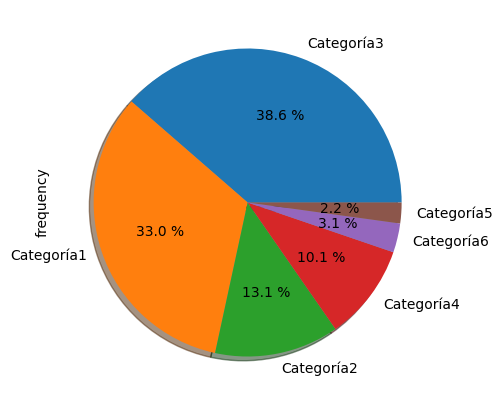

In [362]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

---------------------------------------------------------------------------------------------------------------------------

In [363]:
n = data['bathrooms_text'].dropna().shape[0]
n

34061

In [364]:
data['bathrooms_numeric'] = data['bathrooms_text'].astype(str).str.extract(r'(\d+)').astype(float)


In [365]:
# Filtrar valores 0.0
data = data[data['bathrooms_numeric'] != 0.0]

In [366]:
Min = data['bathrooms_numeric'].min()  
Max = data['bathrooms_numeric'].max()  
Limites = [Min,Max]
Limites

[1.0, 24.0]

In [367]:
#Calcula el rango
R = Max - Min
R

23.0

-----------------------------------------

In [368]:
data['beds'].info()
n=26582

<class 'pandas.core.series.Series'>
Index: 35126 entries, 0 to 35246
Series name: beds
Non-Null Count  Dtype  
--------------  -----  
33940 non-null  float64
dtypes: float64(1)
memory usage: 548.8 KB


In [369]:
Min = data["beds"].min()  
Max = data["beds"].max()  
Limites = [Min,Max]
Limites

[0.0, 38.0]

In [370]:
#Calcula el rango
R = Max - Min
R

38.0

In [371]:
#Calcular el número de Intervalos de Clase (ni). Se aplica la regla de Sturges (Donde “n” el tamaño de la muestra.):
ni = 1+3.32*np.log10(n)
ni

15.689631010177528

In [372]:
#Calcular el Ancho del Intervalo ( i )
i = R/ni
i

2.4219817518557454

In [373]:
# Ver resultado
intervalos = np.linspace(0, 50, 16) #Número de clases más uno
intervalos

array([ 0.        ,  3.33333333,  6.66666667, 10.        , 13.33333333,
       16.66666667, 20.        , 23.33333333, 26.66666667, 30.        ,
       33.33333333, 36.66666667, 40.        , 43.33333333, 46.66666667,
       50.        ])

In [374]:
categorias = ["Categoría1", "Categoría2", "Categoría3", "Categoría4",
              "Categoría5", "Categoría6", "Categoría7", "Categoría8",
              "Categoría9","Categoría10","Categoría11","Categoría12",
              "Categoría13","Categoría14","Categoría15"]

In [375]:
data["beds"] = pd.cut(x = data["beds"], bins = intervalos, labels = categorias)
data["beds"]


0        Categoría1
1        Categoría1
2        Categoría1
3        Categoría1
4        Categoría1
            ...    
35242           NaN
35243           NaN
35244           NaN
35245           NaN
35246           NaN
Name: beds, Length: 35126, dtype: category
Categories (15, object): ['Categoría1' < 'Categoría2' < 'Categoría3' < 'Categoría4' ... 'Categoría12' < 'Categoría13' < 'Categoría14' < 'Categoría15']

In [376]:
#Obtengo un análisis univariado de una variable categórica en específico  
data1 = freq_tbl(data["beds"])
data1

beds  frequency  percentage  cumulative_perc
0    Categoría1      29086    0.828048         0.874846
1    Categoría2       3743    0.106559         0.987427
2    Categoría3        338    0.009623         0.997594
3    Categoría4         45    0.001281         0.998947
4    Categoría5         27    0.000769         0.999759
5    Categoría6          4    0.000114         0.999880
6    Categoría8          2    0.000057         0.999940
7    Categoría9          1    0.000028         0.999970
8   Categoría12          1    0.000028         1.000000
9    Categoría7          0    0.000000         1.000000
10  Categoría10          0    0.000000         1.000000
11  Categoría11          0    0.000000         1.000000
12  Categoría13          0    0.000000         1.000000
13  Categoría14          0    0.000000         1.000000
14  Categoría15          0    0.000000         1.000000

In [377]:
#Elimino las columnas "procentage" y "cumulative_perc" para trabajar con las fecuencias
table5 = data1.drop(['percentage'], axis=1)
table5

beds  frequency  cumulative_perc
0    Categoría1      29086         0.874846
1    Categoría2       3743         0.987427
2    Categoría3        338         0.997594
3    Categoría4         45         0.998947
4    Categoría5         27         0.999759
5    Categoría6          4         0.999880
6    Categoría8          2         0.999940
7    Categoría9          1         0.999970
8   Categoría12          1         1.000000
9    Categoría7          0         1.000000
10  Categoría10          0         1.000000
11  Categoría11          0         1.000000
12  Categoría13          0         1.000000
13  Categoría14          0         1.000000
14  Categoría15          0         1.000000

In [378]:
filtro5 = table5[table5['frequency'] > 300]
filtro5

beds  frequency  cumulative_perc
0  Categoría1      29086         0.874846
1  Categoría2       3743         0.987427
2  Categoría3        338         0.997594

In [379]:
#Ajusto el indice de mi DataFrame
Filtro_index = filtro5.set_index("beds")
Filtro_index

frequency  cumulative_perc
beds                                  
Categoría1      29086         0.874846
Categoría2       3743         0.987427
Categoría3        338         0.997594

<Axes: ylabel='frequency'>

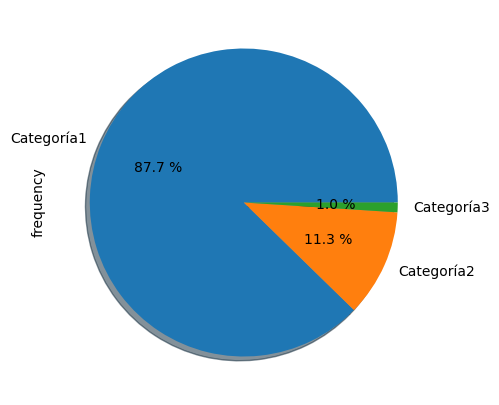

In [380]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [381]:
data['price'].info()
n=26582

<class 'pandas.core.series.Series'>
Index: 35126 entries, 0 to 35246
Series name: price
Non-Null Count  Dtype 
--------------  ----- 
33940 non-null  object
dtypes: object(1)
memory usage: 548.8+ KB


In [382]:
# Eliminar caracteres no numéricos ($, ,)
data["price"] = data["price"].str.replace("[$,]", "", regex=True)

# Convertir a número
data["price"] = pd.to_numeric(data["price"], errors="coerce")

In [383]:
Min = data["price"].min()  
Max = data["price"].max()  
Limites = [Min,Max]
Limites

[8.0, 72000.0]

In [384]:
#Calcula el rango
R = Max - Min
R

71992.0

In [385]:
#Calcular el número de Intervalos de Clase (ni). Se aplica la regla de Sturges (Donde “n” el tamaño de la muestra.):
ni = 1+3.32*np.log10(n)
ni

15.689631010177528

In [386]:
#Calcular el Ancho del Intervalo ( i )
i = R/ni
i

4588.5081652526005

In [387]:
# Ver resultado
intervalos = np.linspace(0.0,435481.0, 16) #Número de clases más uno
intervalos

array([     0.        ,  29032.06666667,  58064.13333333,  87096.2       ,
       116128.26666667, 145160.33333333, 174192.4       , 203224.46666667,
       232256.53333333, 261288.6       , 290320.66666667, 319352.73333333,
       348384.8       , 377416.86666667, 406448.93333333, 435481.        ])

In [388]:
categorias = ["Categoría1", "Categoría2", "Categoría3", "Categoría4",
              "Categoría5", "Categoría6", "Categoría7", "Categoría8",
              "Categoría9","Categoría10","Categoría11","Categoría12",
              "Categoría13","Categoría14","Categoría15"]

In [389]:
data["price"] = pd.cut(x = data["price"], bins = intervalos, labels = categorias)
data["price"]

0        Categoría1
1        Categoría1
2        Categoría1
3        Categoría1
4        Categoría1
            ...    
35242           NaN
35243           NaN
35244           NaN
35245           NaN
35246           NaN
Name: price, Length: 35126, dtype: category
Categories (15, object): ['Categoría1' < 'Categoría2' < 'Categoría3' < 'Categoría4' ... 'Categoría12' < 'Categoría13' < 'Categoría14' < 'Categoría15']

In [390]:
#Obtengo un análisis univariado de una variable categórica en específico  
data1 = freq_tbl(data["price"])
data1

price  frequency  percentage  cumulative_perc
0    Categoría1      33939    0.966207         0.999971
1    Categoría3          1    0.000028         1.000000
2    Categoría2          0    0.000000         1.000000
3    Categoría4          0    0.000000         1.000000
4    Categoría5          0    0.000000         1.000000
5    Categoría6          0    0.000000         1.000000
6    Categoría7          0    0.000000         1.000000
7    Categoría8          0    0.000000         1.000000
8    Categoría9          0    0.000000         1.000000
9   Categoría10          0    0.000000         1.000000
10  Categoría11          0    0.000000         1.000000
11  Categoría12          0    0.000000         1.000000
12  Categoría13          0    0.000000         1.000000
13  Categoría14          0    0.000000         1.000000
14  Categoría15          0    0.000000         1.000000

In [391]:
#Elimino las columnas "procentage" y "cumulative_perc" para trabajar con las fecuencias
table6 = data1.drop(['percentage', 'cumulative_perc'], axis=1)
table6

price  frequency
0    Categoría1      33939
1    Categoría3          1
2    Categoría2          0
3    Categoría4          0
4    Categoría5          0
5    Categoría6          0
6    Categoría7          0
7    Categoría8          0
8    Categoría9          0
9   Categoría10          0
10  Categoría11          0
11  Categoría12          0
12  Categoría13          0
13  Categoría14          0
14  Categoría15          0

In [392]:
filtro6 = table6[table6['frequency'] > 2]
filtro6

price  frequency
0  Categoría1      33939

In [393]:
#Ajusto el indice de mi DataFrame
Filtro_index = filtro6.set_index("price")
Filtro_index

frequency
price                
Categoría1      33939

Text(0, 0.5, 'Frecuencia')

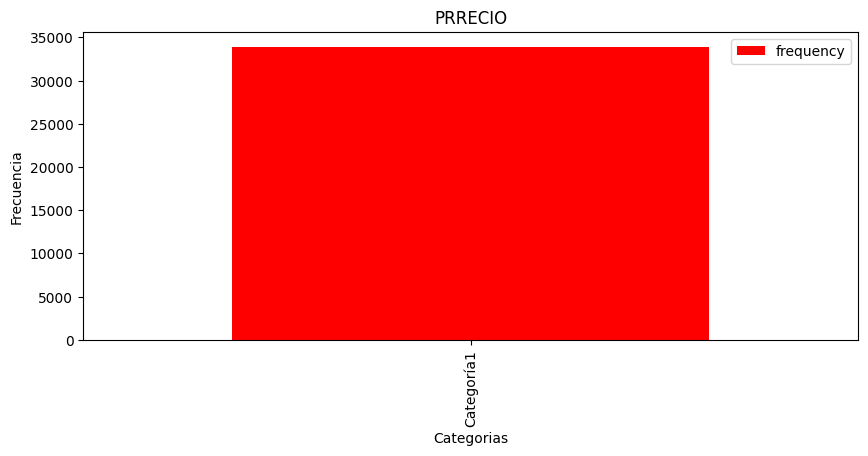

In [394]:
#Realizamos grafico de barras del Dataframe filtrado
Filtro_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color = "red")
plt.title('PRRECIO')
plt.xlabel('Categorias')
plt.ylabel('Frecuencia')

In [395]:
Min = data["maximum_nights_avg_ntm"].min()  
Max = data["maximum_nights_avg_ntm"].max()  
Limites = [Min,Max]
Limites

[1.0, 2147483647.0]

In [396]:
#Calcula el rango
R = Max - Min
R

2147483646.0

In [397]:
#Calcular el número de Intervalos de Clase (ni). Se aplica la regla de Sturges (Donde “n” el tamaño de la muestra.):
ni = 1+3.32*np.log10(n)
ni

15.689631010177528

In [398]:
#Calcular el Ancho del Intervalo ( i )
i = R/ni
i

136872794.81633273

In [399]:
# Ver resultado
intervalos = np.linspace(0.0, 1.0, 12) #Número de clases más uno
intervalos

array([0.        , 0.09090909, 0.18181818, 0.27272727, 0.36363636,
       0.45454545, 0.54545455, 0.63636364, 0.72727273, 0.81818182,
       0.90909091, 1.        ])

In [400]:
categorias = ["Categoría1", "Categoría2", "Categoría3", "Categoría4",
              "Categoría5", "Categoría6", "Categoría7", "Categoría8",
              "Categoría9","Categoría10","Categoría11"]


In [401]:
data["maximum_nights_avg_ntm"] = pd.cut(x = data["maximum_nights_avg_ntm"], bins = intervalos, labels = categorias)
data["maximum_nights_avg_ntm"]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
35242    NaN
35243    NaN
35244    NaN
35245    NaN
35246    NaN
Name: maximum_nights_avg_ntm, Length: 35126, dtype: category
Categories (11, object): ['Categoría1' < 'Categoría2' < 'Categoría3' < 'Categoría4' ... 'Categoría8' < 'Categoría9' < 'Categoría10' < 'Categoría11']

In [402]:
#Obtengo un análisis univariado de una variable categórica en específico  
data1 = freq_tbl(data["maximum_nights_avg_ntm"])
data1

maximum_nights_avg_ntm  frequency  percentage  cumulative_perc
0             Categoría11         31    0.000883              1.0
1              Categoría1          0    0.000000              1.0
2              Categoría2          0    0.000000              1.0
3              Categoría3          0    0.000000              1.0
4              Categoría4          0    0.000000              1.0
5              Categoría5          0    0.000000              1.0
6              Categoría6          0    0.000000              1.0
7              Categoría7          0    0.000000              1.0
8              Categoría8          0    0.000000              1.0
9              Categoría9          0    0.000000              1.0
10            Categoría10          0    0.000000              1.0

In [403]:
#Elimino las columnas "procentage" y "cumulative_perc" para trabajar con las fecuencias
table7 = data1.drop(['percentage', 'cumulative_perc'], axis=1)
table7

maximum_nights_avg_ntm  frequency
0             Categoría11         31
1              Categoría1          0
2              Categoría2          0
3              Categoría3          0
4              Categoría4          0
5              Categoría5          0
6              Categoría6          0
7              Categoría7          0
8              Categoría8          0
9              Categoría9          0
10            Categoría10          0

In [404]:
filtro7 = table7[table7['frequency'] > 1]
filtro7

maximum_nights_avg_ntm  frequency
0            Categoría11         31

In [405]:
#Ajusto el indice de mi DataFrame
Filtro_index = filtro7.set_index("maximum_nights_avg_ntm")
Filtro_index

frequency
maximum_nights_avg_ntm           
Categoría11                    31

<Axes: xlabel='maximum_nights_avg_ntm'>

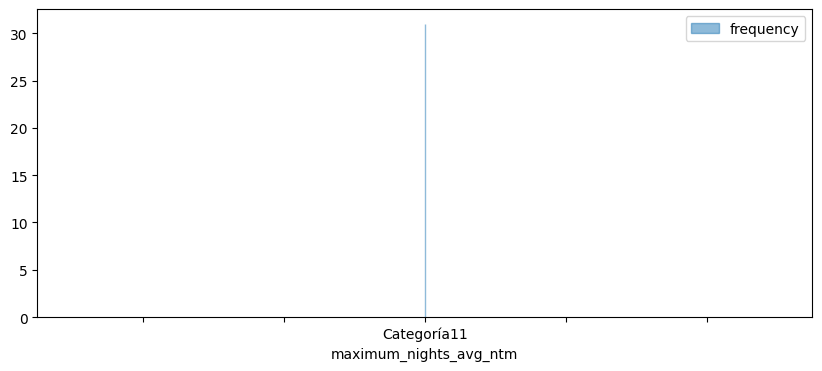

In [406]:
#Realizamos grafico de área del dataframe filtrado
Filtro_index.plot(kind='area', figsize=(10,4), alpha = 0.5)

In [407]:
Min = data["availability_365"].min()  
Max = data["availability_365"].max()  
Limites = [Min,Max]
Limites

[0.0, 365.0]

In [408]:
#Calcula el rango
R = Max - Min
R

365.0

In [409]:
n=26582

In [410]:
#Calcular el número de Intervalos de Clase (ni). Se aplica la regla de Sturges (Donde “n” el tamaño de la muestra.):
ni = 1+3.32*np.log10(n)
ni

15.689631010177528

In [411]:
#Calcular el Ancho del Intervalo ( i )
i = R/ni
i

23.263772090193346

In [412]:
# Ver resultado
intervalos = np.linspace(0, 365, 12) #Número de clases más uno
intervalos

array([  0.        ,  33.18181818,  66.36363636,  99.54545455,
       132.72727273, 165.90909091, 199.09090909, 232.27272727,
       265.45454545, 298.63636364, 331.81818182, 365.        ])

In [413]:
categorias = ["Categoría1", "Categoría2", "Categoría3", "Categoría4",
              "Categoría5", "Categoría6", "Categoría7", "Categoría8",
              "Categoría9","Categoría10","Categoría11"]

In [414]:
data["availability_365"] = pd.cut(x = data["availability_365"], bins = intervalos, labels = categorias)
data["availability_365"]

0        Categoría11
1         Categoría8
2         Categoría2
3        Categoría10
4         Categoría2
            ...     
35242            NaN
35243            NaN
35244            NaN
35245            NaN
35246            NaN
Name: availability_365, Length: 35126, dtype: category
Categories (11, object): ['Categoría1' < 'Categoría2' < 'Categoría3' < 'Categoría4' ... 'Categoría8' < 'Categoría9' < 'Categoría10' < 'Categoría11']

In [415]:
#Obtengo un análisis univariado de una variable categórica en específico  
data1 = freq_tbl(data["availability_365"])
data1

availability_365  frequency  percentage  cumulative_perc
0       Categoría10       5268    0.149974         0.169498
1       Categoría11       4592    0.130729         0.317246
2        Categoría8       3120    0.088823         0.417632
3        Categoría9       2975    0.084695         0.513353
4        Categoría5       2701    0.076895         0.600257
5        Categoría3       2392    0.068098         0.677220
6        Categoría7       2366    0.067358         0.753346
7        Categoría2       2141    0.060952         0.822233
8        Categoría4       2067    0.058845         0.888739
9        Categoría6       1835    0.052241         0.947780
10       Categoría1       1623    0.046205         1.000000

In [416]:
#Elimino las columnas "procentage" y "cumulative_perc" para trabajar con las fecuencias
table8 = data1.drop(['percentage'], axis=1)
table8

availability_365  frequency  cumulative_perc
0       Categoría10       5268         0.169498
1       Categoría11       4592         0.317246
2        Categoría8       3120         0.417632
3        Categoría9       2975         0.513353
4        Categoría5       2701         0.600257
5        Categoría3       2392         0.677220
6        Categoría7       2366         0.753346
7        Categoría2       2141         0.822233
8        Categoría4       2067         0.888739
9        Categoría6       1835         0.947780
10       Categoría1       1623         1.000000

In [417]:
filtro8 = table8[table8['frequency'] > 1000]
filtro8

availability_365  frequency  cumulative_perc
0       Categoría10       5268         0.169498
1       Categoría11       4592         0.317246
2        Categoría8       3120         0.417632
3        Categoría9       2975         0.513353
4        Categoría5       2701         0.600257
5        Categoría3       2392         0.677220
6        Categoría7       2366         0.753346
7        Categoría2       2141         0.822233
8        Categoría4       2067         0.888739
9        Categoría6       1835         0.947780
10       Categoría1       1623         1.000000

In [418]:
#Ajusto el indice de mi DataFrame
Filtro_index = filtro8.set_index("availability_365")
Filtro_index

frequency  cumulative_perc
availability_365                            
Categoría10            5268         0.169498
Categoría11            4592         0.317246
Categoría8             3120         0.417632
Categoría9             2975         0.513353
Categoría5             2701         0.600257
Categoría3             2392         0.677220
Categoría7             2366         0.753346
Categoría2             2141         0.822233
Categoría4             2067         0.888739
Categoría6             1835         0.947780
Categoría1             1623         1.000000

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

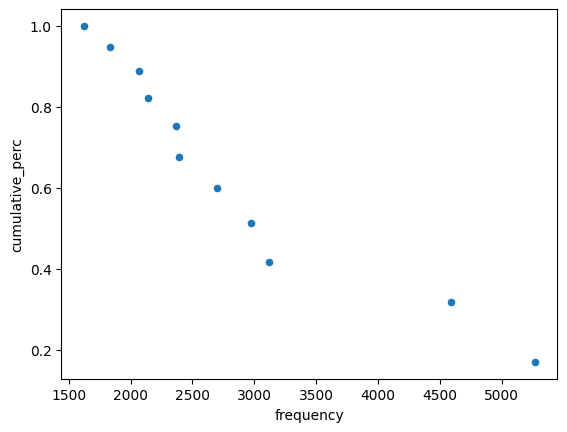

In [419]:
#Realizamos grafico de dispersión del dataframe filtrado
table8.plot("frequency", "cumulative_perc", kind="scatter")

In [420]:
Min = data["number_of_reviews"].min()  
Max = data["number_of_reviews"].max()  
Limites = [Min,Max]
Limites

[0.0, 2317.0]

In [421]:
#Calcula el rango
R = Max - Min
R

2317.0

In [422]:
#Calcular el número de Intervalos de Clase (ni). Se aplica la regla de Sturges (Donde “n” el tamaño de la muestra.):
ni = 1+3.32*np.log10(n)
ni

15.689631010177528

In [423]:
#Calcular el Ancho del Intervalo ( i )
i = R/ni
i

147.67715050130954

In [424]:
# Ver resultado
intervalos = np.linspace(0, 1282, 12) #Número de clases más uno
intervalos

array([   0.        ,  116.54545455,  233.09090909,  349.63636364,
        466.18181818,  582.72727273,  699.27272727,  815.81818182,
        932.36363636, 1048.90909091, 1165.45454545, 1282.        ])

In [425]:
categorias = ["Categoría1", "Categoría2", "Categoría3", "Categoría4",
              "Categoría5", "Categoría6", "Categoría7", "Categoría8",
              "Categoría9","Categoría10","Categoría11"]

In [426]:
data["number_of_reviews"] = pd.cut(x = data["number_of_reviews"], bins = intervalos, labels = categorias)
data["number_of_reviews"]


0        Categoría1
1        Categoría1
2        Categoría3
3        Categoría1
4        Categoría2
            ...    
35242           NaN
35243           NaN
35244           NaN
35245           NaN
35246           NaN
Name: number_of_reviews, Length: 35126, dtype: category
Categories (11, object): ['Categoría1' < 'Categoría2' < 'Categoría3' < 'Categoría4' ... 'Categoría8' < 'Categoría9' < 'Categoría10' < 'Categoría11']

In [427]:
#Obtengo un análisis univariado de una variable categórica en específico  
data1 = freq_tbl(data["number_of_reviews"])
data1

number_of_reviews  frequency  percentage  cumulative_perc
0         Categoría1      23769    0.676678         0.822770
1         Categoría2       3251    0.092553         0.935304
2         Categoría3       1139    0.032426         0.974731
3         Categoría4        468    0.013323         0.990931
4         Categoría5        170    0.004840         0.996815
5         Categoría6         63    0.001794         0.998996
6         Categoría7         21    0.000598         0.999723
7         Categoría8          5    0.000142         0.999896
8        Categoría10          2    0.000057         0.999965
9         Categoría9          1    0.000028         1.000000
10       Categoría11          0    0.000000         1.000000

In [428]:
#Elimino las columnas "procentage" y "cumulative_perc" para trabajar con las fecuencias
table9 = data1.drop(['percentage', 'cumulative_perc'], axis=1)
table9

number_of_reviews  frequency
0         Categoría1      23769
1         Categoría2       3251
2         Categoría3       1139
3         Categoría4        468
4         Categoría5        170
5         Categoría6         63
6         Categoría7         21
7         Categoría8          5
8        Categoría10          2
9         Categoría9          1
10       Categoría11          0

In [429]:
filtro9 = table9[table9['frequency'] > 10]
filtro9

number_of_reviews  frequency
0        Categoría1      23769
1        Categoría2       3251
2        Categoría3       1139
3        Categoría4        468
4        Categoría5        170
5        Categoría6         63
6        Categoría7         21

In [430]:
#Ajusto el indice de mi DataFrame
Filtro_index = filtro9.set_index("number_of_reviews")
Filtro_index


frequency
number_of_reviews           
Categoría1             23769
Categoría2              3251
Categoría3              1139
Categoría4               468
Categoría5               170
Categoría6                63
Categoría7                21

<Axes: xlabel='number_of_reviews'>

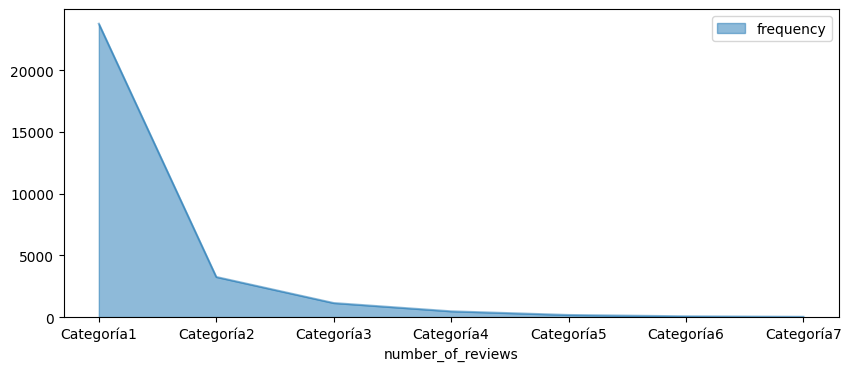

In [431]:
#Realizamos grafico de área del dataframe filtrado
Filtro_index.plot(kind='area', figsize=(10,4), alpha = 0.5)

In [432]:
Min = data["review_scores_location"].min()  
Max = data["review_scores_location"].max()  
Limites = [Min,Max]
Limites

[1.0, 5.0]

In [433]:
#Calcula el rango
R = Max - Min
R

4.0

In [434]:
#Calcular el número de Intervalos de Clase (ni). Se aplica la regla de Sturges (Donde “n” el tamaño de la muestra.):
ni = 1+3.32*np.log10(n)
ni


15.689631010177528

In [435]:
#Calcular el Ancho del Intervalo ( i )
i = R/ni
i

0.2549454475637627

In [436]:
# Ver resultado
intervalos = np.linspace(1.0, 5.0, 12) #Número de clases más uno
intervalos

array([1.        , 1.36363636, 1.72727273, 2.09090909, 2.45454545,
       2.81818182, 3.18181818, 3.54545455, 3.90909091, 4.27272727,
       4.63636364, 5.        ])

In [437]:
categorias = ["Categoría1", "Categoría2", "Categoría3", "Categoría4",
              "Categoría5", "Categoría6", "Categoría7", "Categoría8",
              "Categoría9","Categoría10","Categoría11"]

In [438]:
data["review_scores_location"] = pd.cut(x = data["review_scores_location"], bins = intervalos, labels = categorias)
data["review_scores_location"]


0        Categoría10
1        Categoría11
2        Categoría11
3        Categoría11
4        Categoría11
            ...     
35242            NaN
35243            NaN
35244            NaN
35245            NaN
35246            NaN
Name: review_scores_location, Length: 35126, dtype: category
Categories (11, object): ['Categoría1' < 'Categoría2' < 'Categoría3' < 'Categoría4' ... 'Categoría8' < 'Categoría9' < 'Categoría10' < 'Categoría11']

In [439]:
#Obtengo un análisis univariado de una variable categórica en específico  
data1 = freq_tbl(data["review_scores_location"])
data1

review_scores_location  frequency  percentage  cumulative_perc
0             Categoría11      26406    0.751751         0.778456
1             Categoría10       5456    0.155327         0.939300
2              Categoría9       1560    0.044412         0.985289
3              Categoría8        210    0.005978         0.991480
4              Categoría6        142    0.004043         0.995666
5              Categoría7        109    0.003103         0.998880
6              Categoría3         20    0.000569         0.999469
7              Categoría5         13    0.000370         0.999853
8              Categoría4          4    0.000114         0.999971
9              Categoría1          1    0.000028         1.000000
10             Categoría2          0    0.000000         1.000000

In [440]:
#Elimino las columnas "procentage" y "cumulative_perc" para trabajar con las fecuencias
table10 = data1.drop(['percentage'], axis=1)
table10

review_scores_location  frequency  cumulative_perc
0             Categoría11      26406         0.778456
1             Categoría10       5456         0.939300
2              Categoría9       1560         0.985289
3              Categoría8        210         0.991480
4              Categoría6        142         0.995666
5              Categoría7        109         0.998880
6              Categoría3         20         0.999469
7              Categoría5         13         0.999853
8              Categoría4          4         0.999971
9              Categoría1          1         1.000000
10             Categoría2          0         1.000000

In [441]:
filtro10 = table10[table10['frequency'] > 20]
filtro10

review_scores_location  frequency  cumulative_perc
0            Categoría11      26406         0.778456
1            Categoría10       5456         0.939300
2             Categoría9       1560         0.985289
3             Categoría8        210         0.991480
4             Categoría6        142         0.995666
5             Categoría7        109         0.998880

In [442]:
#Ajusto el indice de mi DataFrame
Filtro_index = filtro10.set_index("review_scores_location")
Filtro_index

frequency  cumulative_perc
review_scores_location                            
Categoría11                 26406         0.778456
Categoría10                  5456         0.939300
Categoría9                   1560         0.985289
Categoría8                    210         0.991480
Categoría6                    142         0.995666
Categoría7                    109         0.998880

Text(0, 0.5, 'Frecuencia')

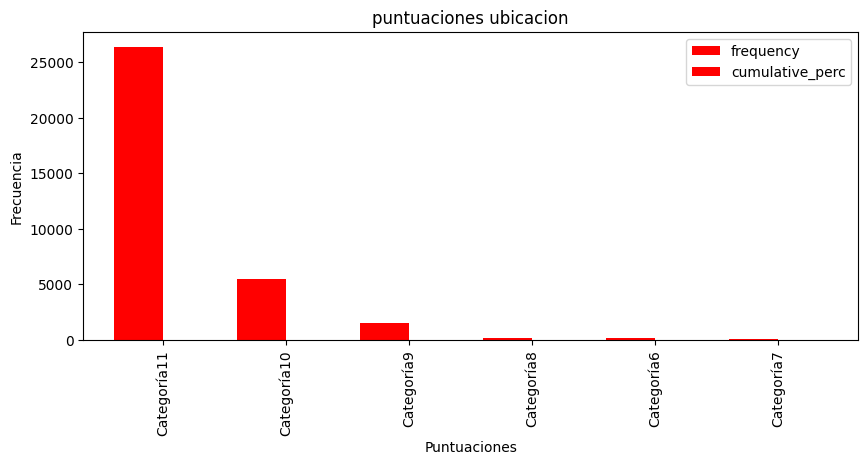

In [443]:
#Realizamos grafico de barras del Dataframe filtrado
Filtro_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color = "red")
plt.title('puntuaciones ubicacion')
plt.xlabel('Puntuaciones')
plt.ylabel('Frecuencia')

In [444]:
Min = data["review_scores_value"].min()  
Max = data["review_scores_value"].max()  
Limites = [Min,Max]
Limites

[1.0, 5.0]

In [445]:
#Calcula el rango
R = Max - Min
R

4.0

In [446]:
#Calcular el número de Intervalos de Clase (ni). Se aplica la regla de Sturges (Donde “n” el tamaño de la muestra.):
ni = 1+3.32*np.log10(n)
ni

15.689631010177528

In [447]:
#Calcular el Ancho del Intervalo ( i )
i = R/ni
i

0.2549454475637627

In [448]:
# Ver resultado
intervalos = np.linspace(1.0, 5.0, 12) #Número de clases más uno
intervalos

array([1.        , 1.36363636, 1.72727273, 2.09090909, 2.45454545,
       2.81818182, 3.18181818, 3.54545455, 3.90909091, 4.27272727,
       4.63636364, 5.        ])

In [449]:
categorias = ["Categoría1", "Categoría2", "Categoría3", "Categoría4",
              "Categoría5", "Categoría6", "Categoría7", "Categoría8",
              "Categoría9","Categoría10","Categoría11"]

In [450]:
data["review_scores_value"] = pd.cut(x = data["review_scores_value"], bins = intervalos, labels = categorias)
data["review_scores_value"]

0        Categoría10
1        Categoría10
2        Categoría11
3        Categoría11
4        Categoría10
            ...     
35242            NaN
35243            NaN
35244            NaN
35245            NaN
35246            NaN
Name: review_scores_value, Length: 35126, dtype: category
Categories (11, object): ['Categoría1' < 'Categoría2' < 'Categoría3' < 'Categoría4' ... 'Categoría8' < 'Categoría9' < 'Categoría10' < 'Categoría11']

In [451]:
#Obtengo un análisis univariado de una variable categórica en específico  
data1 = freq_tbl(data["review_scores_value"])
data1

review_scores_value  frequency  percentage  cumulative_perc
0          Categoría11      24542    0.698685         0.724060
1          Categoría10       6719    0.191283         0.922289
2           Categoría9       1842    0.052440         0.976634
3           Categoría8        300    0.008541         0.985485
4           Categoría6        227    0.006462         0.992182
5           Categoría7        178    0.005067         0.997433
6           Categoría3         46    0.001310         0.998790
7           Categoría5         29    0.000826         0.999646
8           Categoría4          8    0.000228         0.999882
9           Categoría2          4    0.000114         1.000000
10          Categoría1          0    0.000000         1.000000

In [452]:
#Elimino las columnas "procentage" y "cumulative_perc" para trabajar con las fecuencias
table11 = data1.drop(['percentage', 'cumulative_perc'], axis=1)
table11

review_scores_value  frequency
0          Categoría11      24542
1          Categoría10       6719
2           Categoría9       1842
3           Categoría8        300
4           Categoría6        227
5           Categoría7        178
6           Categoría3         46
7           Categoría5         29
8           Categoría4          8
9           Categoría2          4
10          Categoría1          0

In [453]:

filtro11 = table11[table11['frequency'] > 30]
filtro11

review_scores_value  frequency
0         Categoría11      24542
1         Categoría10       6719
2          Categoría9       1842
3          Categoría8        300
4          Categoría6        227
5          Categoría7        178
6          Categoría3         46

In [454]:
#Ajusto el indice de mi DataFrame
Filtro_index = filtro11.set_index("review_scores_value")
Filtro_index

frequency
review_scores_value           
Categoría11              24542
Categoría10               6719
Categoría9                1842
Categoría8                 300
Categoría6                 227
Categoría7                 178
Categoría3                  46

<Axes: xlabel='review_scores_value'>

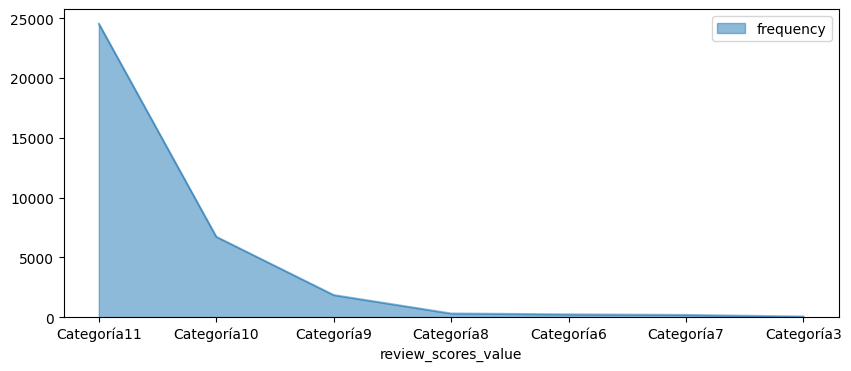

In [455]:
#Realizamos grafico de área del dataframe filtrado
Filtro_index.plot(kind='area', figsize=(10,4), alpha = 0.5)

In [456]:
Min = data["reviews_per_month"].min()  
Max = data["reviews_per_month"].max()  
Limites = [Min,Max]
Limites

[0.01, 40.11]

In [457]:
#Calcula el rango
R = Max - Min
R

40.1

In [458]:
#Calcular el número de Intervalos de Clase (ni). Se aplica la regla de Sturges (Donde “n” el tamaño de la muestra.):
ni = 1+3.32*np.log10(n)
ni

15.689631010177528

In [459]:
#Calcular el Ancho del Intervalo ( i )
i = R/ni
i

2.5558281118267208

In [460]:
intervalos = np.linspace(0.01, 38.67, 12) #Número de clases más uno
intervalos

array([1.00000000e-02, 3.52454545e+00, 7.03909091e+00, 1.05536364e+01,
       1.40681818e+01, 1.75827273e+01, 2.10972727e+01, 2.46118182e+01,
       2.81263636e+01, 3.16409091e+01, 3.51554545e+01, 3.86700000e+01])

In [461]:
categorias = ["Categoría1", "Categoría2", "Categoría3", "Categoría4",
              "Categoría5", "Categoría6", "Categoría7", "Categoría8",
              "Categoría9","Categoría10","Categoría11"]


In [462]:
data["reviews_per_month"] = pd.cut(x = data["reviews_per_month"], bins = intervalos, labels = categorias)
data["reviews_per_month"]

0        Categoría1
1        Categoría1
2        Categoría1
3        Categoría1
4        Categoría1
            ...    
35242           NaN
35243           NaN
35244           NaN
35245           NaN
35246           NaN
Name: reviews_per_month, Length: 35126, dtype: category
Categories (11, object): ['Categoría1' < 'Categoría2' < 'Categoría3' < 'Categoría4' ... 'Categoría8' < 'Categoría9' < 'Categoría10' < 'Categoría11']

In [463]:
#Obtengo un análisis univariado de una variable categórica en específico  
data1 = freq_tbl(data["reviews_per_month"])
data1

reviews_per_month  frequency  percentage  cumulative_perc
0         Categoría1      29312    0.834482         0.867245
1         Categoría2       4241    0.120737         0.992722
2         Categoría3        239    0.006804         0.999793
3         Categoría4          5    0.000142         0.999941
4         Categoría5          1    0.000028         0.999970
5        Categoría10          1    0.000028         1.000000
6         Categoría6          0    0.000000         1.000000
7         Categoría7          0    0.000000         1.000000
8         Categoría8          0    0.000000         1.000000
9         Categoría9          0    0.000000         1.000000
10       Categoría11          0    0.000000         1.000000

In [464]:
#Elimino las columnas "procentage" y "cumulative_perc" para trabajar con las fecuencias
table12 = data1.drop(['percentage', 'cumulative_perc'], axis=1)
table12

reviews_per_month  frequency
0         Categoría1      29312
1         Categoría2       4241
2         Categoría3        239
3         Categoría4          5
4         Categoría5          1
5        Categoría10          1
6         Categoría6          0
7         Categoría7          0
8         Categoría8          0
9         Categoría9          0
10       Categoría11          0

In [465]:
filtro12 = table12[table12['frequency'] > 2]
filtro12

reviews_per_month  frequency
0        Categoría1      29312
1        Categoría2       4241
2        Categoría3        239
3        Categoría4          5

In [466]:
#Ajusto el indice de mi DataFrame
Filtro_index = filtro12.set_index("reviews_per_month")
Filtro_index


frequency
reviews_per_month           
Categoría1             29312
Categoría2              4241
Categoría3               239
Categoría4                 5

Text(0, 0.5, 'Frecuencia')

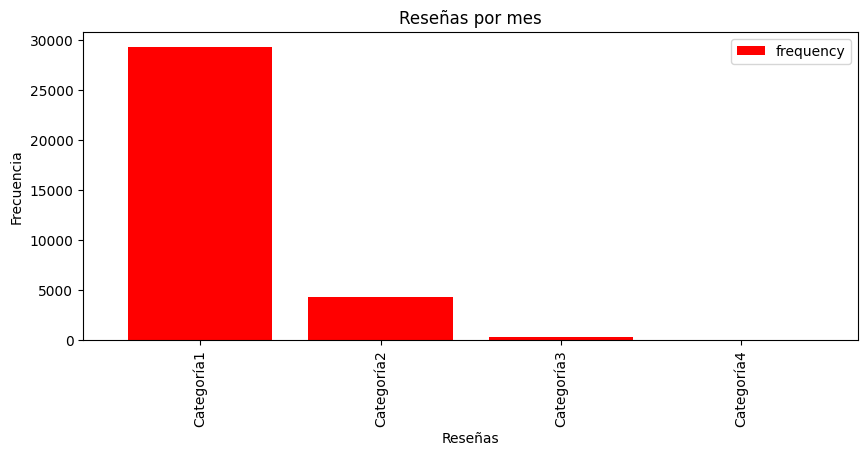

In [467]:
#Realizamos grafico de barras del Dataframe filtrado
Filtro_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color = "red")
plt.title('Reseñas por mes')
plt.xlabel('Reseñas')
plt.ylabel('Frecuencia')

In [468]:
Min = data["review_scores_communication"].min()  
Max = data["review_scores_communication"].max()  
Limites = [Min,Max]
Limites

[1.0, 5.0]

In [469]:
#Calcula el rango
R = Max - Min
R

4.0

In [470]:
#Calcular el número de Intervalos de Clase (ni). Se aplica la regla de Sturges (Donde “n” el tamaño de la muestra.):
ni = 1+3.32*np.log10(n)
ni

15.689631010177528

In [471]:
#Calcular el Ancho del Intervalo ( i )
i = R/ni
i

0.2549454475637627

In [472]:
intervalos = np.linspace(1.0, 5.0, 12) #Número de clases más uno
intervalos

array([1.        , 1.36363636, 1.72727273, 2.09090909, 2.45454545,
       2.81818182, 3.18181818, 3.54545455, 3.90909091, 4.27272727,
       4.63636364, 5.        ])

In [473]:
categorias = ["Categoría1", "Categoría2", "Categoría3", "Categoría4",
              "Categoría5", "Categoría6", "Categoría7", "Categoría8",
              "Categoría9","Categoría10","Categoría11"]


In [474]:
data["review_scores_communication"] = pd.cut(x = data["review_scores_communication"], bins = intervalos, labels = categorias)
data["review_scores_communication"]

0        Categoría11
1        Categoría11
2        Categoría11
3        Categoría11
4        Categoría11
            ...     
35242            NaN
35243            NaN
35244            NaN
35245            NaN
35246            NaN
Name: review_scores_communication, Length: 35126, dtype: category
Categories (11, object): ['Categoría1' < 'Categoría2' < 'Categoría3' < 'Categoría4' ... 'Categoría8' < 'Categoría9' < 'Categoría10' < 'Categoría11']

In [475]:
#Obtengo un análisis univariado de una variable categórica en específico  
data1 = freq_tbl(data["review_scores_communication"])
data1

review_scores_communication  frequency  percentage  cumulative_perc
0                  Categoría11      30859    0.878523         0.910107
1                  Categoría10       2082    0.059272         0.971510
2                   Categoría9        603    0.017167         0.989294
3                   Categoría8        130    0.003701         0.993128
4                   Categoría6        101    0.002875         0.996107
5                   Categoría7         83    0.002363         0.998555
6                   Categoría3         28    0.000797         0.999381
7                   Categoría5         15    0.000427         0.999823
8                   Categoría2          5    0.000142         0.999971
9                   Categoría4          1    0.000028         1.000000
10                  Categoría1          0    0.000000         1.000000

In [476]:
#Elimino las columnas "procentage" y "cumulative_perc" para trabajar con las fecuencias
table13 = data1.drop(['percentage', 'cumulative_perc'], axis=1)
table13

review_scores_communication  frequency
0                  Categoría11      30859
1                  Categoría10       2082
2                   Categoría9        603
3                   Categoría8        130
4                   Categoría6        101
5                   Categoría7         83
6                   Categoría3         28
7                   Categoría5         15
8                   Categoría2          5
9                   Categoría4          1
10                  Categoría1          0

In [477]:
filtro13 = table13[table13['frequency'] > 400]
filtro13

review_scores_communication  frequency
0                 Categoría11      30859
1                 Categoría10       2082
2                  Categoría9        603

In [478]:
#Ajusto el indice de mi DataFrame
Filtro_index = filtro13.set_index("review_scores_communication")
Filtro_index

frequency
review_scores_communication           
Categoría11                      30859
Categoría10                       2082
Categoría9                         603

<Axes: ylabel='frequency'>

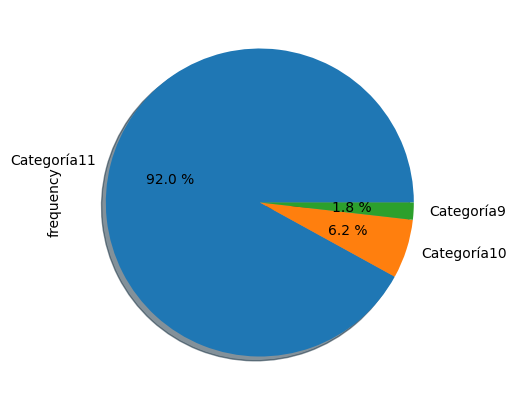

In [479]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

In [480]:
Min = data["review_scores_checkin"].min()  
Max = data["review_scores_checkin"].max()  
Limites = [Min,Max]
Limites

[1.0, 5.0]

In [481]:
#Calcula el rango
R = Max - Min
R

4.0

In [482]:
#Calcular el número de Intervalos de Clase (ni). Se aplica la regla de Sturges (Donde “n” el tamaño de la muestra.):
ni = 1+3.32*np.log10(n)
ni

15.689631010177528

In [483]:
#Calcular el Ancho del Intervalo ( i )
i = R/ni
i

0.2549454475637627

In [484]:
intervalos = np.linspace(1.0, 5.0, 12) #Número de clases más uno
intervalos

array([1.        , 1.36363636, 1.72727273, 2.09090909, 2.45454545,
       2.81818182, 3.18181818, 3.54545455, 3.90909091, 4.27272727,
       4.63636364, 5.        ])

In [485]:
categorias = ["Categoría1", "Categoría2", "Categoría3", "Categoría4",
              "Categoría5", "Categoría6", "Categoría7", "Categoría8",
              "Categoría9","Categoría10","Categoría11"]

In [486]:
data["review_scores_checkin"] = pd.cut(x = data["review_scores_checkin"], bins = intervalos, labels = categorias)
data["review_scores_checkin"]


0        Categoría11
1        Categoría11
2        Categoría11
3        Categoría11
4        Categoría11
            ...     
35242            NaN
35243            NaN
35244            NaN
35245            NaN
35246            NaN
Name: review_scores_checkin, Length: 35126, dtype: category
Categories (11, object): ['Categoría1' < 'Categoría2' < 'Categoría3' < 'Categoría4' ... 'Categoría8' < 'Categoría9' < 'Categoría10' < 'Categoría11']

In [487]:
#Obtengo un análisis univariado de una variable categórica en específico  
data1 = freq_tbl(data["review_scores_checkin"])
data1

review_scores_checkin  frequency  percentage  cumulative_perc
0            Categoría11      30822    0.877470         0.909069
1            Categoría10       2147    0.061123         0.972393
2             Categoría9        614    0.017480         0.990503
3             Categoría8        105    0.002989         0.993600
4             Categoría6        100    0.002847         0.996549
5             Categoría7         70    0.001993         0.998614
6             Categoría3         28    0.000797         0.999440
7             Categoría5         12    0.000342         0.999794
8             Categoría4          4    0.000114         0.999912
9             Categoría2          3    0.000085         1.000000
10            Categoría1          0    0.000000         1.000000

In [488]:
#Elimino las columnas "procentage" y "cumulative_perc" para trabajar con las fecuencias
table14 = data1.drop(['percentage'], axis=1)
table14

review_scores_checkin  frequency  cumulative_perc
0            Categoría11      30822         0.909069
1            Categoría10       2147         0.972393
2             Categoría9        614         0.990503
3             Categoría8        105         0.993600
4             Categoría6        100         0.996549
5             Categoría7         70         0.998614
6             Categoría3         28         0.999440
7             Categoría5         12         0.999794
8             Categoría4          4         0.999912
9             Categoría2          3         1.000000
10            Categoría1          0         1.000000

In [489]:
filtro14 = table14[table14['frequency'] > 50]
filtro14

review_scores_checkin  frequency  cumulative_perc
0           Categoría11      30822         0.909069
1           Categoría10       2147         0.972393
2            Categoría9        614         0.990503
3            Categoría8        105         0.993600
4            Categoría6        100         0.996549
5            Categoría7         70         0.998614

In [490]:
#Ajusto el indice de mi DataFrame
Filtro_index = filtro14.set_index("review_scores_checkin")
Filtro_index

frequency  cumulative_perc
review_scores_checkin                            
Categoría11                30822         0.909069
Categoría10                 2147         0.972393
Categoría9                   614         0.990503
Categoría8                   105         0.993600
Categoría6                   100         0.996549
Categoría7                    70         0.998614

<Axes: xlabel='frequency', ylabel='cumulative_perc'>

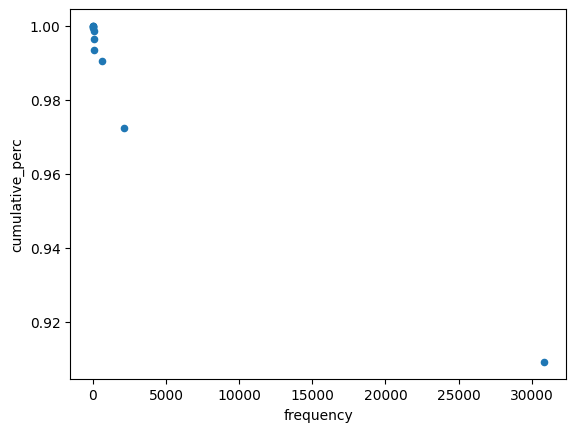

In [491]:
#Realizamos grafico de dispersión del dataframe filtrado
table14.plot("frequency", "cumulative_perc", kind="scatter")

In [492]:
Min = data["review_scores_cleanliness"].min()  
Max = data["review_scores_cleanliness"].max()  
Limites = [Min,Max]
Limites

[1.0, 5.0]

In [493]:
#Calcula el rango
R = Max - Min
R


4.0

In [494]:
#Calcular el número de Intervalos de Clase (ni). Se aplica la regla de Sturges (Donde “n” el tamaño de la muestra.):
ni = 1+3.32*np.log10(n)
ni

15.689631010177528

In [495]:
#Calcular el Ancho del Intervalo ( i )
i = R/ni
i


0.2549454475637627

In [496]:
intervalos = np.linspace(1.0, 5.0, 12) #Número de clases más uno
intervalos

array([1.        , 1.36363636, 1.72727273, 2.09090909, 2.45454545,
       2.81818182, 3.18181818, 3.54545455, 3.90909091, 4.27272727,
       4.63636364, 5.        ])

In [497]:
categorias = ["Categoría1", "Categoría2", "Categoría3", "Categoría4",
              "Categoría5", "Categoría6", "Categoría7", "Categoría8",
              "Categoría9","Categoría10","Categoría11"]


In [498]:
data["review_scores_cleanliness"] = pd.cut(x = data["review_scores_cleanliness"], bins = intervalos, labels = categorias)
data["review_scores_cleanliness"]


0        Categoría10
1        Categoría10
2        Categoría11
3        Categoría11
4        Categoría10
            ...     
35242            NaN
35243            NaN
35244            NaN
35245            NaN
35246            NaN
Name: review_scores_cleanliness, Length: 35126, dtype: category
Categories (11, object): ['Categoría1' < 'Categoría2' < 'Categoría3' < 'Categoría4' ... 'Categoría8' < 'Categoría9' < 'Categoría10' < 'Categoría11']

In [499]:
#Obtengo un análisis univariado de una variable categórica en específico  
data1 = freq_tbl(data["review_scores_cleanliness"])
data1

review_scores_cleanliness  frequency  percentage  cumulative_perc
0                Categoría11      27938    0.795365         0.823984
1                Categoría10       4209    0.119826         0.948121
2                 Categoría9       1220    0.034732         0.984103
3                 Categoría8        240    0.006833         0.991182
4                 Categoría6        124    0.003530         0.994839
5                 Categoría7        120    0.003416         0.998378
6                 Categoría3         28    0.000797         0.999204
7                 Categoría5         18    0.000512         0.999735
8                 Categoría4          7    0.000199         0.999941
9                 Categoría2          2    0.000057         1.000000
10                Categoría1          0    0.000000         1.000000

In [500]:
#Elimino las columnas "procentage" y "cumulative_perc" para trabajar con las fecuencias
table15 = data1.drop(['percentage', 'cumulative_perc'], axis=1)
table15

review_scores_cleanliness  frequency
0                Categoría11      27938
1                Categoría10       4209
2                 Categoría9       1220
3                 Categoría8        240
4                 Categoría6        124
5                 Categoría7        120
6                 Categoría3         28
7                 Categoría5         18
8                 Categoría4          7
9                 Categoría2          2
10                Categoría1          0

In [501]:
filtro15 = table15[table15['frequency'] > 30]
filtro15


review_scores_cleanliness  frequency
0               Categoría11      27938
1               Categoría10       4209
2                Categoría9       1220
3                Categoría8        240
4                Categoría6        124
5                Categoría7        120

In [502]:
#Ajusto el indice de mi DataFrame
Filtro_index = filtro15.set_index("review_scores_cleanliness")
Filtro_index

frequency
review_scores_cleanliness           
Categoría11                    27938
Categoría10                     4209
Categoría9                      1220
Categoría8                       240
Categoría6                       124
Categoría7                       120

<Axes: xlabel='review_scores_cleanliness'>

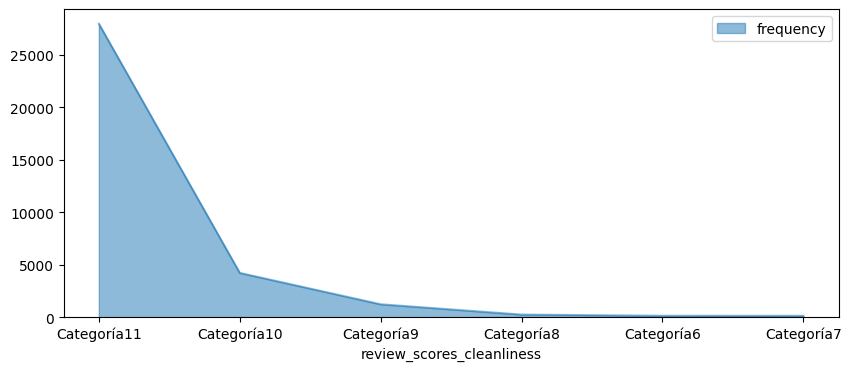

In [503]:
#Realizamos grafico de área del dataframe filtrado
Filtro_index.plot(kind='area', figsize=(10,4), alpha = 0.5)

In [504]:
Min = data["review_scores_accuracy"].min()  
Max = data["review_scores_accuracy"].max()  
Limites = [Min,Max]
Limites


[1.0, 5.0]

In [505]:
#Calcula el rango
R = Max - Min
R

4.0

In [506]:
#Calcular el número de Intervalos de Clase (ni). Se aplica la regla de Sturges (Donde “n” el tamaño de la muestra.):
ni = 1+3.32*np.log10(n)
ni

15.689631010177528

In [507]:
#Calcular el Ancho del Intervalo ( i )
i = R/ni
i

0.2549454475637627

In [508]:
intervalos = np.linspace(1.0, 5.0, 12) #Número de clases más uno
intervalos

array([1.        , 1.36363636, 1.72727273, 2.09090909, 2.45454545,
       2.81818182, 3.18181818, 3.54545455, 3.90909091, 4.27272727,
       4.63636364, 5.        ])

In [509]:
categorias = ["Categoría1", "Categoría2", "Categoría3", "Categoría4",
              "Categoría5", "Categoría6", "Categoría7", "Categoría8",
              "Categoría9","Categoría10","Categoría11"]

In [510]:
data["review_scores_accuracy"] = pd.cut(x = data["review_scores_accuracy"], bins = intervalos, labels = categorias)
data["review_scores_accuracy"]

0                NaN
1        Categoría11
2        Categoría11
3        Categoría10
4        Categoría10
            ...     
35242            NaN
35243            NaN
35244            NaN
35245            NaN
35246            NaN
Name: review_scores_accuracy, Length: 35126, dtype: category
Categories (11, object): ['Categoría1' < 'Categoría2' < 'Categoría3' < 'Categoría4' ... 'Categoría8' < 'Categoría9' < 'Categoría10' < 'Categoría11']

In [511]:
#Obtengo un análisis univariado de una variable categórica en específico  
data1 = freq_tbl(data["review_scores_accuracy"])
data1

review_scores_accuracy  frequency  percentage  cumulative_perc
0             Categoría11      24790    0.705745         0.843513
1             Categoría10       3318    0.094460         0.956412
2              Categoría9        872    0.024825         0.986083
3              Categoría8        146    0.004156         0.991051
4              Categoría6        115    0.003274         0.994964
5              Categoría7         88    0.002505         0.997958
6              Categoría3         38    0.001082         0.999251
7              Categoría5         15    0.000427         0.999762
8              Categoría2          4    0.000114         0.999898
9              Categoría4          3    0.000085         1.000000
10             Categoría1          0    0.000000         1.000000

In [512]:
#Elimino las columnas "procentage" y "cumulative_perc" para trabajar con las fecuencias
table16 = data1.drop(['percentage', 'cumulative_perc'], axis=1)
table16

review_scores_accuracy  frequency
0             Categoría11      24790
1             Categoría10       3318
2              Categoría9        872
3              Categoría8        146
4              Categoría6        115
5              Categoría7         88
6              Categoría3         38
7              Categoría5         15
8              Categoría2          4
9              Categoría4          3
10             Categoría1          0

In [513]:
filtro16 = table16[table2['frequency'] > 70]
filtro16

C:\Users\diego\AppData\Local\Temp\ipykernel_12772\1528683562.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtro16 = table16[table2['frequency'] > 70]


review_scores_accuracy  frequency
0             Categoría11      24790
1             Categoría10       3318
2              Categoría9        872
3              Categoría8        146
4              Categoría6        115
5              Categoría7         88
6              Categoría3         38
7              Categoría5         15
8              Categoría2          4
9              Categoría4          3
10             Categoría1          0

In [514]:
#Ajusto el indice de mi DataFrame
Filtro_index = filtro16.set_index("review_scores_accuracy")
Filtro_index

frequency
review_scores_accuracy           
Categoría11                 24790
Categoría10                  3318
Categoría9                    872
Categoría8                    146
Categoría6                    115
Categoría7                     88
Categoría3                     38
Categoría5                     15
Categoría2                      4
Categoría4                      3
Categoría1                      0

Text(0, 0.5, 'Frecuencia')

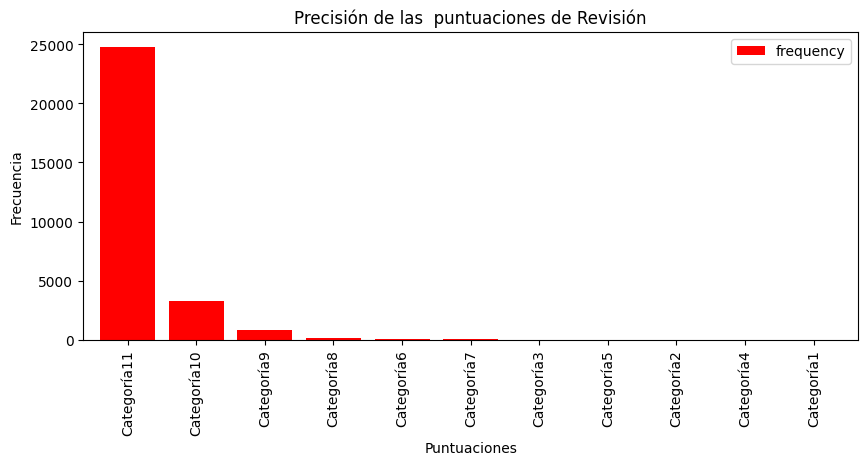

In [515]:
#Realizamos grafico de barras del Dataframe filtrado
Filtro_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color = "red")
plt.title('Precisión de las  puntuaciones de Revisión')
plt.xlabel('Puntuaciones')
plt.ylabel('Frecuencia')